### Import Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical

### Data Loading

***Loading test-set***

In [5]:
base_dir_test="input/Test"

In [6]:
class_labels=os.listdir(base_dir_test)
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [7]:
test_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_test, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(256,256))
            image=img_to_array(image)
            image=image/255.0
            test_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/Test\Apple___Apple_scab
input/Test\Apple___Black_rot
input/Test\Apple___Cedar_apple_rust
input/Test\Apple___healthy


In [8]:
print(len(test_data))

500


In [9]:
x_test,Y_test =zip(*test_data)

In [10]:
x_test

(array([[[0.91764706, 0.88235295, 0.9490196 ],
         [0.7490196 , 0.7137255 , 0.78039217],
         [0.7176471 , 0.68235296, 0.7490196 ],
         ...,
         [0.13725491, 0.13333334, 0.20392157],
         [0.13725491, 0.13333334, 0.20392157],
         [0.13725491, 0.13333334, 0.20392157]],
 
        [[0.8117647 , 0.7764706 , 0.84313726],
         [0.76862746, 0.73333335, 0.8       ],
         [0.9411765 , 0.90588236, 0.972549  ],
         ...,
         [0.13333334, 0.12941177, 0.2       ],
         [0.13333334, 0.12941177, 0.2       ],
         [0.13333334, 0.12941177, 0.2       ]],
 
        [[0.83137256, 0.79607844, 0.8627451 ],
         [0.8509804 , 0.8156863 , 0.88235295],
         [0.7882353 , 0.7529412 , 0.81960785],
         ...,
         [0.14509805, 0.14117648, 0.21176471],
         [0.14509805, 0.14117648, 0.21176471],
         [0.14117648, 0.13725491, 0.20784314]],
 
        ...,
 
        [[0.11764706, 0.12941177, 0.20392157],
         [0.11764706, 0.12941177, 0.20392

In [11]:
print(Y_test)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [12]:
X_test=np.array(x_test)
y_test=np.array(Y_test)

In [13]:
print(X_test.shape,y_test.shape)

(500, 256, 256, 3) (500,)


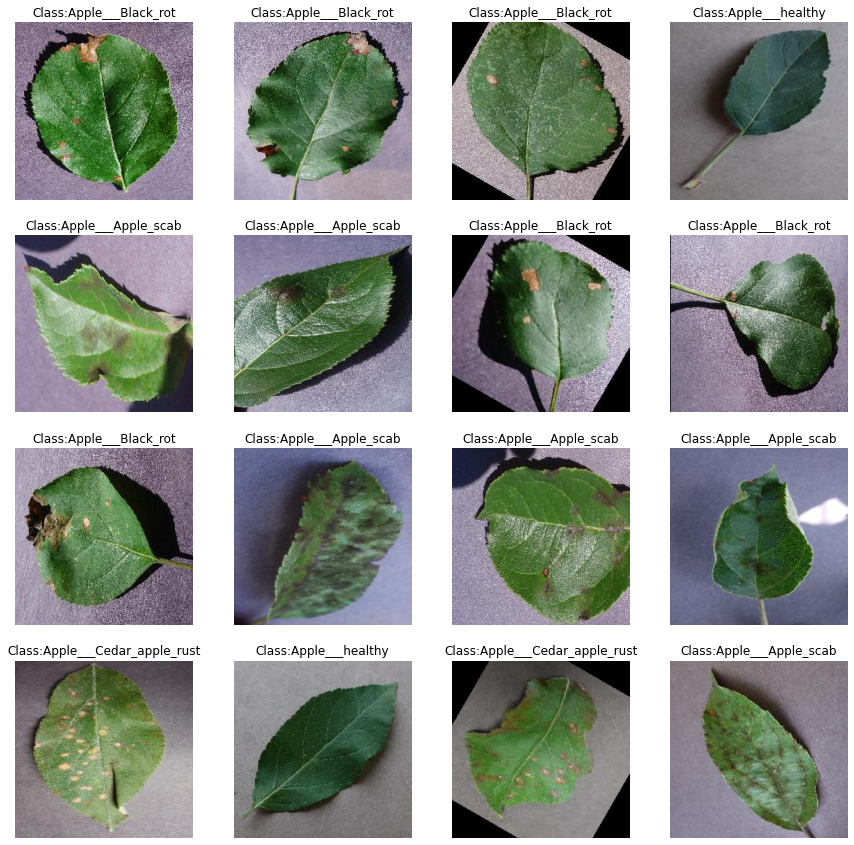

In [14]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_test.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_test,y_test)

***Loading train-set***

In [15]:
base_dir_train="input/Train"

In [16]:
class_labels=os.listdir(base_dir_train)
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [17]:
train_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_train, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(256,256))
            image=img_to_array(image)
            image=image/255.0
            train_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/Train\Apple___Apple_scab
input/Train\Apple___Black_rot
input/Train\Apple___Cedar_apple_rust
input/Train\Apple___healthy


In [18]:
print(len(train_data))

2411


In [19]:
x_train,Y_train =zip(*train_data)

In [20]:
x_train

(array([[[0.654902  , 0.6392157 , 0.76862746],
         [0.6509804 , 0.63529414, 0.7647059 ],
         [0.64705884, 0.6313726 , 0.7607843 ],
         ...,
         [0.7254902 , 0.7137255 , 0.827451  ],
         [0.7176471 , 0.7058824 , 0.81960785],
         [0.70980394, 0.69803923, 0.8117647 ]],
 
        [[0.6666667 , 0.6509804 , 0.78039217],
         [0.6627451 , 0.64705884, 0.7764706 ],
         [0.65882355, 0.6431373 , 0.77254903],
         ...,
         [0.7294118 , 0.7176471 , 0.83137256],
         [0.72156864, 0.70980394, 0.8235294 ],
         [0.7176471 , 0.7058824 , 0.81960785]],
 
        [[0.6666667 , 0.6509804 , 0.78039217],
         [0.6627451 , 0.64705884, 0.7764706 ],
         [0.65882355, 0.6431373 , 0.77254903],
         ...,
         [0.7372549 , 0.7254902 , 0.8392157 ],
         [0.7294118 , 0.7176471 , 0.83137256],
         [0.7254902 , 0.7137255 , 0.827451  ]],
 
        ...,
 
        [[0.39215687, 0.3529412 , 0.4862745 ],
         [0.4       , 0.36078432, 0.49411

In [21]:
print(Y_train)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
X_train=np.array(x_train)
y_train=np.array(Y_train)

In [23]:
print(X_train.shape,y_train.shape)

(2411, 256, 256, 3) (2411,)


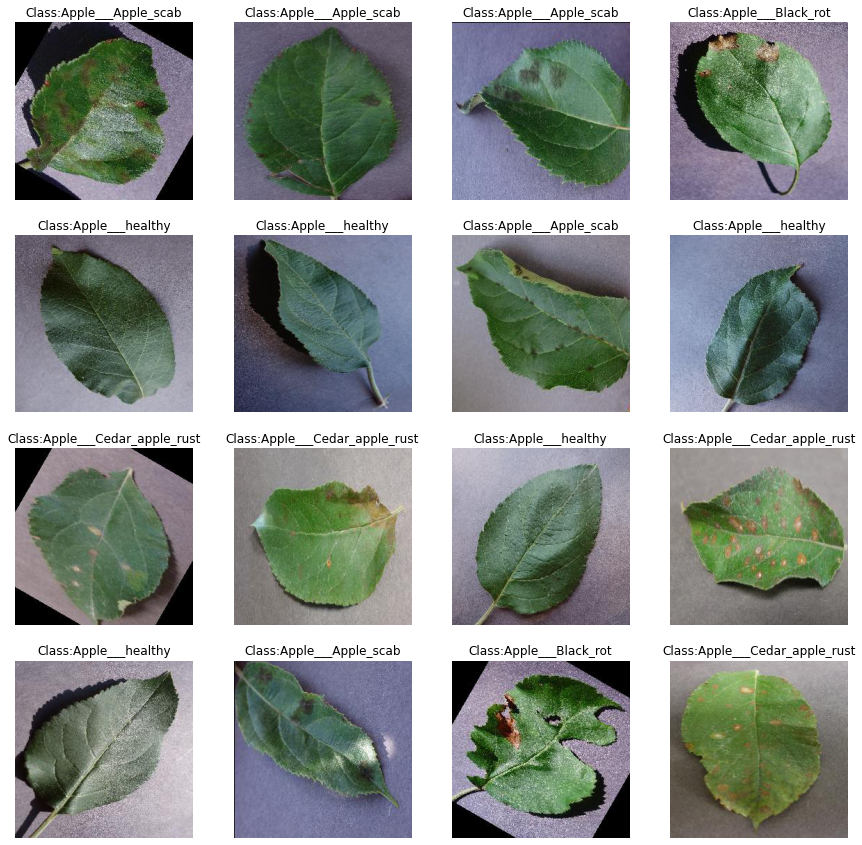

In [24]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_train.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_train,y_train)

### Algorithm - Convolutional Neural Network

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten
from tensorflow.keras.optimizers.legacy import Adam

In [30]:
cnn_model=Sequential()

cnn_model.add(Conv2D(filters=64,kernel_size=3,strides=(1,1),padding="same",activation="relu",input_shape = (256,256,3)))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Conv2D(filters=128,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Conv2D(filters=256,kernel_size=3,strides=(1,1),padding="same",activation="relu"))
cnn_model.add(MaxPool2D(pool_size=(3,3),padding="same"))

cnn_model.add(Flatten())
cnn_model.add(Dropout(rate=0.4))
cnn_model.add(Dense(units=512,activation="relu"))
cnn_model.add(Dense(units=len(class_labels),activation="softmax"))

In [31]:
cnn_model.compile(optimizer=Adam(learning_rate=1e-3,decay=1e-4),loss="categorical_crossentropy",metrics=["accuracy"])

In [32]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 86, 86, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 86, 86, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 128)     

In [28]:
history=cnn_model.fit(x=X_train,y=y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
38/38 [==============================] - 240s 6s/step - loss: 1.1234 - accuracy: 0.4658 - val_loss: 0.7083 - val_accuracy: 0.7000
Epoch 2/10
38/38 [==============================] - 217s 6s/step - loss: 0.6000 - accuracy: 0.7503 - val_loss: 0.9541 - val_accuracy: 0.6560
Epoch 3/10
38/38 [==============================] - 215s 6s/step - loss: 0.4438 - accuracy: 0.8208 - val_loss: 0.3936 - val_accuracy: 0.8440
Epoch 4/10
38/38 [==============================] - 216s 6s/step - loss: 0.3341 - accuracy: 0.8801 - val_loss: 0.3247 - val_accuracy: 0.8660
Epoch 5/10
38/38 [==============================] - 216s 6s/step - loss: 0.2405 - accuracy: 0.9104 - val_loss: 0.2164 - val_accuracy: 0.9020
Epoch 6/10
38/38 [==============================] - 215s 6s/step - loss: 0.1684 - accuracy: 0.9390 - val_loss: 0.1767 - val_accuracy: 0.9440
Epoch 7/10
38/38 [==============================] - 215s 6s/step - loss: 0.1606 - accuracy: 0.9428 - val_loss: 0.1567 - val_accuracy: 0.9560
Epoch 8/10
38

### Accuracy and Loss plot-graphs

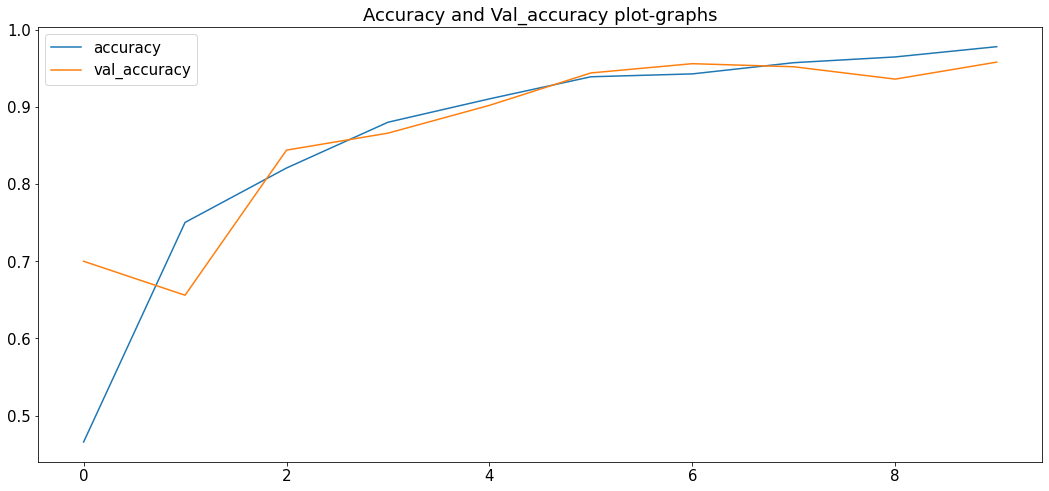

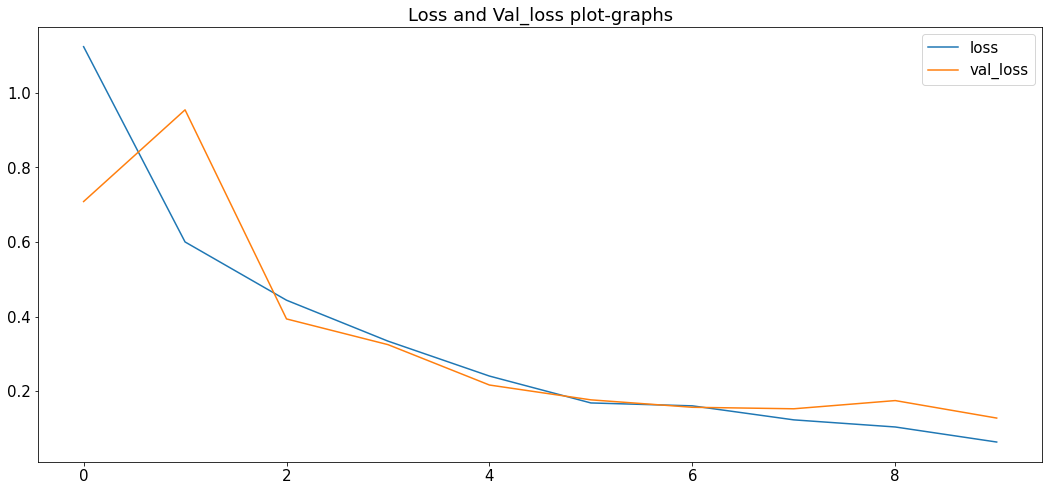

In [29]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=15
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.title(label="Accuracy and Val_accuracy plot-graphs")
plt.legend()
plt.show()

plt.figure(figsize=(18,8))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title(label="Loss and Val_loss plot-graphs")
plt.legend()
plt.show()

In [30]:
cnn_prediction=cnn_model.predict(X_test,batch_size=64,verbose=1)

8/8 [==============================] - 13s 2s/step


In [31]:
print(cnn_prediction)

[[6.5044367e-01 2.2794415e-04 9.6543772e-05 3.4923184e-01]
 [9.9917251e-01 6.6389272e-04 2.8878308e-06 1.6066610e-04]
 [9.9999535e-01 4.1300646e-06 6.7383233e-08 4.0843400e-07]
 ...
 [9.9987015e-03 2.3474675e-04 1.0978838e-04 9.8965681e-01]
 [9.5544419e-06 2.2098969e-07 4.2609163e-10 9.9999022e-01]
 [4.3718373e-06 2.7356472e-07 5.8012289e-10 9.9999535e-01]]


In [32]:
cnn_labels=[]
for i in range(len(cnn_prediction)):
    cnn_labels.append(np.argmax(cnn_prediction[i]))

In [33]:
print(cnn_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [34]:
true_labels=[]
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

In [35]:
print(true_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

### Result Analysis

***Accuracy Score***

In [36]:
cnn_accuracy=accuracy_score(y_true=true_labels,y_pred=cnn_labels)
print("CNN validated accuracy is {:.2f}%".format(cnn_accuracy*100.0))

CNN validated accuracy is 95.80%


***Classification Report***

In [37]:
print(classification_report(y_true=true_labels,y_pred=cnn_labels,target_names=class_labels))

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.89      0.96      0.92       125
       Apple___Black_rot       1.00      0.92      0.96       125
Apple___Cedar_apple_rust       0.98      0.98      0.98       125
         Apple___healthy       0.98      0.97      0.97       125

                accuracy                           0.96       500
               macro avg       0.96      0.96      0.96       500
            weighted avg       0.96      0.96      0.96       500



***Confusion Matrix***

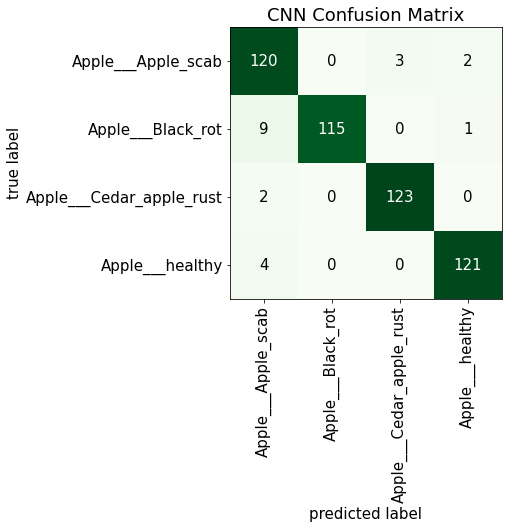

In [38]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=cnn_labels),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Greens)
plt.title(label="CNN Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

***Model Saving***

In [39]:
cnn_model.save(filepath="models/Convolutional_Neural_Network.h5")

## Thank You